## Shot Noise Simulation for Fiber Photometry

In this notebook, we will simulate the fiber photometry recordings with SPAD sensor. Since the sensor is operating limited with shot noise that is caused by sensor's quantum optical structure. 

There are two main functions to runt the simulation. These are 
1. create_wave()
2. simulate_sensor()

The first function let the user to choose the LED patterns that is used for excitation. Two waveforms can be chosen, sine and square. The second function let the user to simulate the sensor with desired steps (we recommend to simulate over 1 second). 

First of all, we import all dependencies and set up the class object to run the simulation. 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from SimulateShotNoise import*

sensor = SimulateShotNoise()

Welcome to Shot Noise Simulation. First choose the waveform which you would like to stimulate the sensor and then run the simulation 


Now we chose the waveform, frequency, amplitude and sampling frequency. Sampling frequency is the time points which
we represent the waveform. In order to get high frequency signals, you need to set this parameter as high as possible.  

(array([ 800., 1000., 1200., 1400., 1600., 1800., 2000., 2200.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

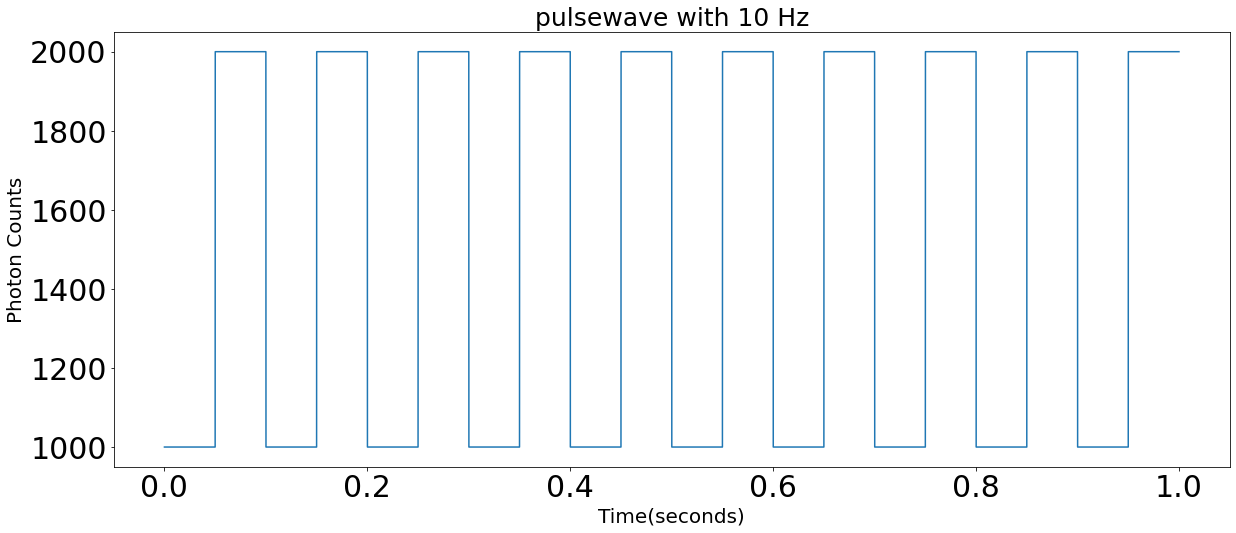

In [2]:
#choosing the waveform
wave_type = 'pulse'
#frequency of the wave on Hz
frequency = 10
#this parameter is just to represent the signal as continious as possible.
sampling_freq = 100000 
#the amplitude in terms of the expected photon counts
amplitude = 1000
#constructing the waveform with the above paramaters

offset = 1000
stimulation = sensor.create_wave(wave_type, frequency, sampling_freq, amplitude, offset)

#just to represent the signal in terms of seconnds.
time_axis = np.arange(0,1,1/sampling_freq)

#plot the waveform (note that sine waveform also has offset parameter to prevent the negative photon counts!)
plt.figure(figsize = (20,8))
plt.plot(time_axis,stimulation)
#plt.xlim([0.2,0.3]) #play with this to observe the wave if you set the high frequency
plt.xlabel('Time(seconds)', fontsize = 20)
plt.ylabel('Photon Counts', fontsize = 20)
plt.title(wave_type+'wave with '+str(frequency)+' Hz', fontsize = 25)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

We now run the simulation with the aforementioned waveform. Another input parameter we need to deliver to the
function is the sensor sampling frequency. In SPAD, this is likely to be 10kHz. This parameter is important as it
will set the standard for maximum frequency that can be observed with the sensor (Nyquist Theorem). 

In [3]:
#setting sampling rate(number of frames per seconds)
sensor_sampling_rate = 10000
#setting patterns into stimulation paramater that we set above
stimulation_pattern = stimulation
#waveform sampling frequency is also needed here. 
waveform_sampling_frequency = sampling_freq
#run the simulation based on the set paramaters
trace = sensor.simulate_sensor(sensor_sampling_rate, stimulation_pattern, waveform_sampling_frequency)


(array([ 800., 1000., 1200., 1400., 1600., 1800., 2000., 2200., 2400.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

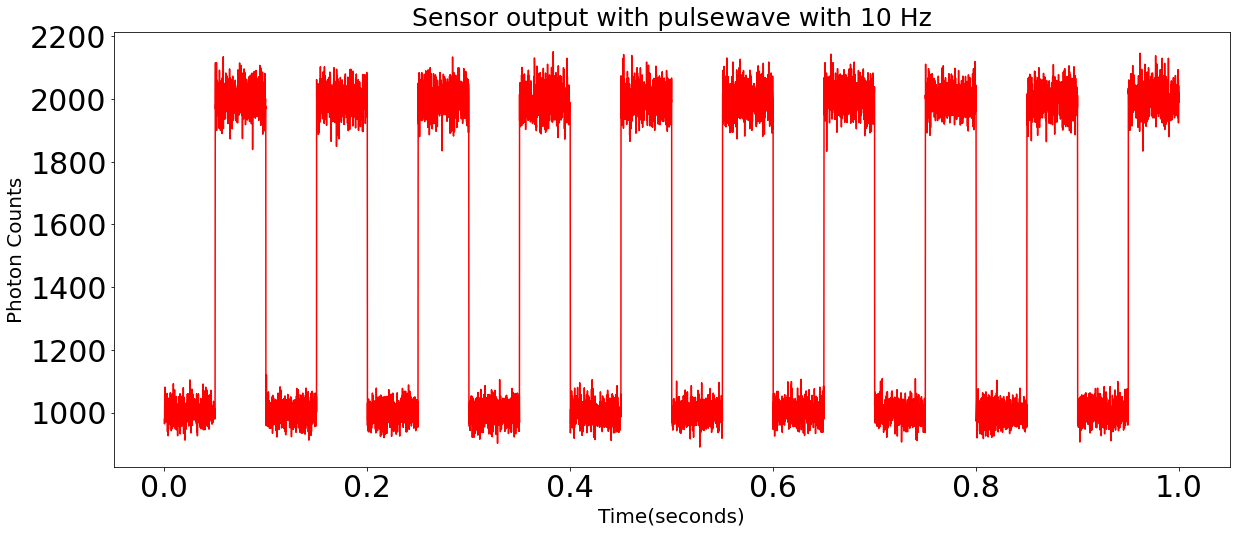

In [4]:
#again setting the time axis to match with second resolutions. 
time_ax = np.arange(0,1,1/10000)

#Plot the sensor response
plt.figure(figsize =(20,8))
plt.plot(time_ax ,trace, 'r-', alpha = 1)
#plt.plot(time_axis, stimulation, alpha = 1)
#plt.xlim([0.2,0.21])
plt.xlabel('Time(seconds)', fontsize = 20)
plt.ylabel('Photon Counts', fontsize = 20)
plt.title('Sensor output with '+wave_type+'wave with '+str(frequency)+' Hz', fontsize = 25)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)